✅ Libraries Imported Successfully

✅ Dataset Loaded Successfully
------------------------------
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72           

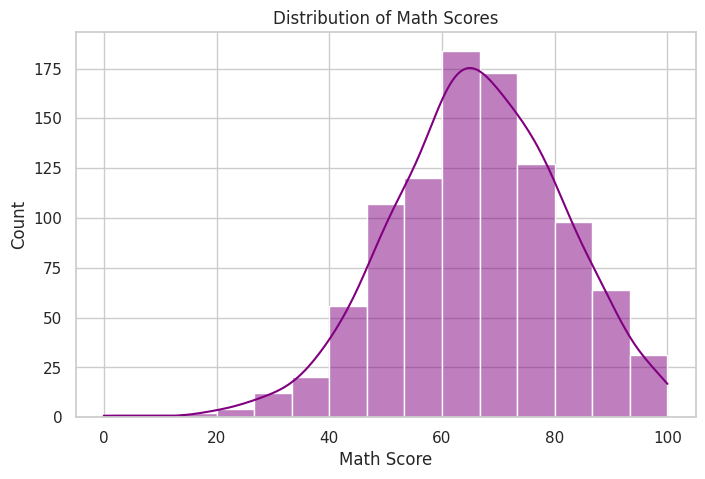

/tmp/ipython-input-2027368057.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='writing score', data=df, palette='pastel')


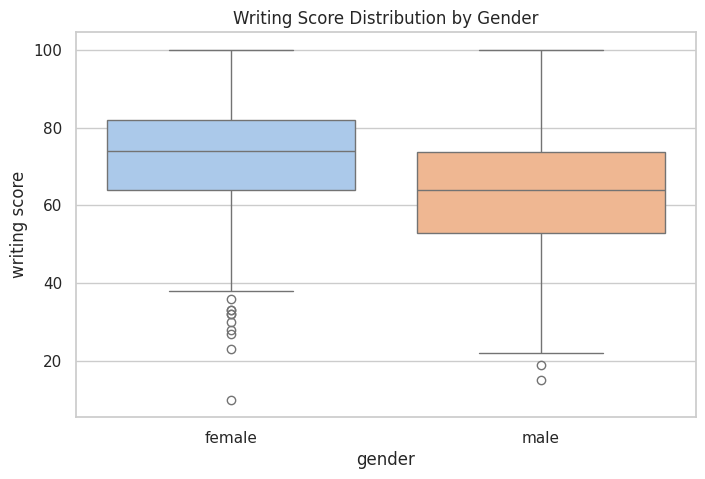

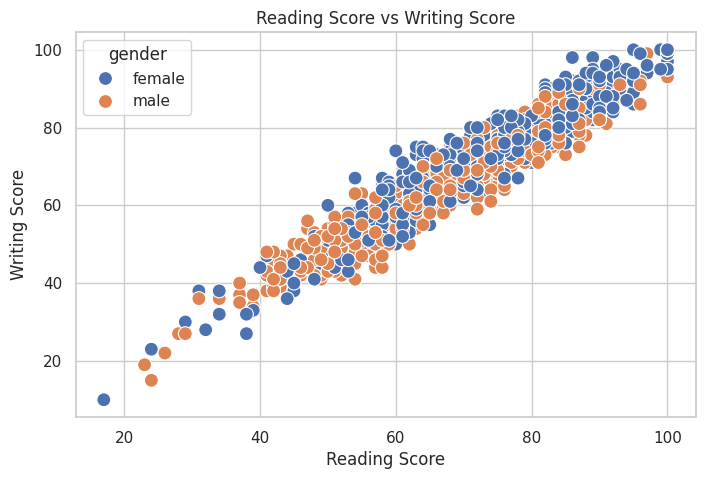


✅ Model Trained and Predictions Made

--- Model Performance Metrics ---
R² Score: 0.9018 (Closer to 1.0 is better)
Mean Absolute Error (MAE): 3.84
Mean Squared Error (MSE): 23.67

--- Model Coefficients ---
Intercept: -1.43
Math Score Coefficient: 0.07
Reading Score Coefficient: 0.94


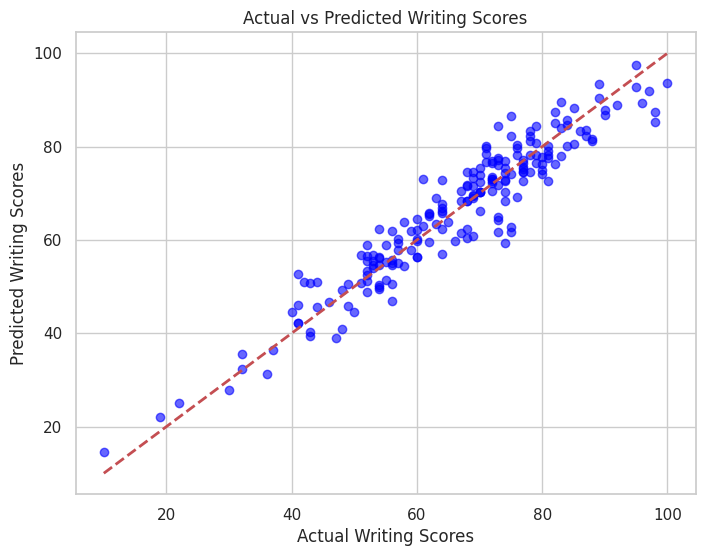


📝 Insights & Conclusion:
1. Correlation: There is usually a very strong positive correlation between Reading and Writing scores.
2. Coefficients: The model suggests that for every 1 point increase in Reading Score, the Writing Score increases by approx 0.94 points.
3. Math Influence: Math score usually has a lower coefficient (0.07) compared to reading, meaning reading skills impact writing skills more than math skills do.
4. Accuracy: An R² score of 0.90 indicates the model is highly accurate.


In [7]:
# ==========================================
# 1. IMPORT LIBRARIES & SETUP
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# plot style for better visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries Imported Successfully")

# ==========================================
# 2. LOAD THE DATASET
# ==========================================
df = pd.read_csv('/content/StudentsPerformance.csv')


print("\n✅ Dataset Loaded Successfully")
print("-" * 30)
print(df.head(10))

# ==========================================
# 3. DATA INSPECTION & CLEANING
# ==========================================
print("\n--- Basic Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isnull().sum())

# ==========================================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# ==========================================

# A. Histogram: Distribution of Math Scores
plt.figure(figsize=(8, 5))
sns.histplot(df['math score'], kde=True, color='purple', bins=15)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.show()

# B. Boxplot: Scores by Gender
# We compare Writing Scores based on Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='writing score', data=df, palette='pastel')
plt.title('Writing Score Distribution by Gender')
plt.show()

# C. Scatter Plot: Reading vs Writing (Checking Correlation)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='reading score', y='writing score', data=df, hue='gender', s=100)
plt.title('Reading Score vs Writing Score')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()

# ==========================================
# 5. MACHINE LEARNING: LINEAR REGRESSION
# ==========================================
# Goal: Predict 'writing score' using 'math score' and 'reading score'

# Step 1: Select Features (X) and Target (y)
X = df[['math score', 'reading score']] # Features
y = df['writing score']                 # Target

# Step 2: Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

print("\n✅ Model Trained and Predictions Made")

# ==========================================
# 6. MODEL EVALUATION
# ==========================================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Performance Metrics ---")
print(f"R² Score: {r2:.4f} (Closer to 1.0 is better)")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Print Model Coefficients
print("\n--- Model Coefficients ---")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Math Score Coefficient: {model.coef_[0]:.2f}")
print(f"Reading Score Coefficient: {model.coef_[1]:.2f}")

# ==========================================
# 7. VISUALIZATION: PREDICTED VS ACTUAL
# ==========================================
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
# Draw a perfect fit line (Diagonal)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Writing Scores')
plt.ylabel('Predicted Writing Scores')
plt.title('Actual vs Predicted Writing Scores')
plt.show()

# ==========================================
# 8. FINAL INSIGHTS
# ==========================================
print("\n📝 Insights & Conclusion:")
print("1. Correlation: There is usually a very strong positive correlation between Reading and Writing scores.")
print(f"2. Coefficients: The model suggests that for every 1 point increase in Reading Score, the Writing Score increases by approx {model.coef_[1]:.2f} points.")
print(f"3. Math Influence: Math score usually has a lower coefficient ({model.coef_[0]:.2f}) compared to reading, meaning reading skills impact writing skills more than math skills do.")
print(f"4. Accuracy: An R² score of {r2:.2f} indicates the model is highly accurate.")